In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None) 

sdata = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate00.csv")
sdata1 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate01.csv")
sdata2 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate02.csv")
sdata3 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate10.csv")
sdata4 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate11.csv")
sdata5 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate12.csv")
sdata6 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate20.csv")
sdata7 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate21.csv")
sdata8 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\New Dataset\magneticnewcoordinate22.csv")

sdata.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata1.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata2.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata3.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata4.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata5.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata6.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata7.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']
sdata8.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude','CoordinateID']

print(sdata.shape,
sdata1.shape,
sdata2.shape,
sdata3.shape,
sdata4.shape,
sdata5.shape,
sdata6.shape,
sdata7.shape,
sdata8.shape)


#Exploratory Data Analysis

df = pd.concat([sdata, sdata1, sdata2, sdata3,sdata4, sdata5, sdata6, sdata7, sdata8], axis=0)

df = df.reset_index(drop=True)

df.head(10000)

Using TensorFlow backend.


(2444, 6) (2774, 6) (3107, 6) (3440, 6) (3760, 6) (4090, 6) (4449, 6) (4772, 6) (5102, 6)


,TimeStamp,X,Y,Z,Magnitude,CoordinateID
0,2020-07-22 05:10:50:003,-17.34,29.519999,-20.520000,27.942548,0
1,2020-07-22 05:10:50:022,-17.40,29.279999,-20.220000,27.751907,0
2,2020-07-22 05:10:50:042,-17.22,29.699999,-20.160000,27.610759,0
3,2020-07-22 05:10:50:062,-17.22,29.279999,-20.460000,27.815462,0
4,2020-07-22 05:10:50:082,-17.58,29.279999,-20.640000,28.171368,0
...,...,...,...,...,...,...
9995,2020-07-22 05:12:17:009,-16.14,29.880000,-22.920000,29.078961,10
9996,2020-07-22 05:12:17:028,-16.38,29.880000,-23.279999,29.496147,10
9997,2020-07-22 05:12:17:048,-17.10,30.000000,-23.640000,30.187075,10
9998,2020-07-22 05:12:17:068,-17.40,30.000000,-23.640000,30.358022,10


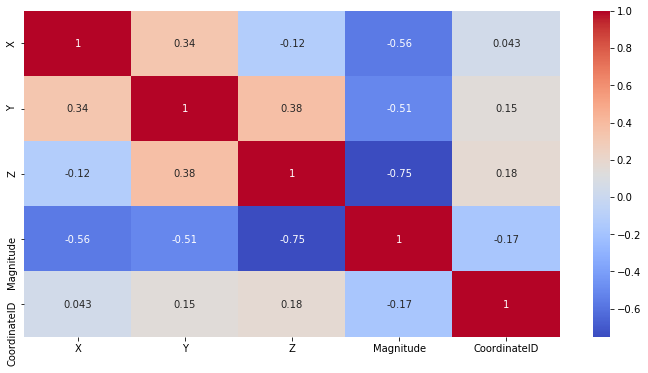

In [2]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

In [3]:
grouper = df.groupby(['CoordinateID',df.reset_index().index // 100])
new_df = grouper.agg(X = ('X', 'mean'), 
                     Y = ('Y', 'mean'),
                     Z = ('Z', 'mean'),
                     Magnitude = ('Magnitude', 'mean')).reset_index(level = 0)

In [5]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=new_df[['X', 'Y', 'Z', 'Magnitude']]  # Features
y=new_df['CoordinateID']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42) 

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(243, 4) (105, 4) (243,) (105,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test Score: ", knn.score(X_test, y_test))

Test Score:  0.09523809523809523


In [25]:
knn.score(X_train, y_train)

0.5102880658436214

In [27]:
from sklearn import neighbors
from math import sqrt

from sklearn import metrics
from sklearn.metrics import mean_squared_error

Knn = neighbors.KNeighborsRegressor()
Knn.fit(X_train, y_train)  
error = sqrt(metrics.mean_squared_error( y_test, Knn.predict(X_test))) 
print('RMSE value of the KNN Model is:', error)

RMSE value of the KNN Model is: 8.54661169286235


In [28]:
Knn.score(X_train, y_train) 

0.17616600283488026

In [30]:
from sklearn.svm import SVR
from sklearn import svm
# First, let's choose which kernel is the best for our data

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print(k,confidence)

linear 0.05136764609845734


C:\Users\Anuj\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


poly -19.001358152376575
rbf 0.09152999395193728
sigmoid -0.0195020409966471


C:\Users\Anuj\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Anuj\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150, random_state = 42, class_weight="balanced")

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print()

In [21]:
clf.score(X_train,y_train)

0.9382716049382716

In [14]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy1:",metrics.accuracy_score(y_test, y_pred))

Accuracy1: 0.09523809523809523


In [23]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [24]:
train_df = new_df.iloc[:,0:5]
train_df

,CoordinateID,X,Y,Z,Magnitude
0,0,-18.087000,28.823400,-20.743800,28.555537
1,0,-18.370800,28.099800,-21.407400,29.220094
2,0,-18.867600,27.093000,-21.903600,29.847360
3,0,-19.766400,28.293000,-21.047400,29.852645
4,0,-19.542000,28.279800,-20.700000,29.466536
...,...,...,...,...,...
335,22,-19.507200,29.747400,-19.830000,28.877100
336,22,-17.300400,30.107399,-21.124800,28.399242
337,22,-17.884800,30.389999,-20.970000,28.645303
338,22,-18.108600,30.191400,-20.847600,28.693820


In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 339
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CoordinateID  348 non-null    int64  
 1   X             348 non-null    float64
 2   Y             348 non-null    float64
 3   Z             348 non-null    float64
 4   Magnitude     348 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


In [26]:
train_AP_strengths = train_df[['X', 'Y', 'Z', 'Magnitude']]
train_AP_strengths

,X,Y,Z,Magnitude
0,-18.087000,28.823400,-20.743800,28.555537
1,-18.370800,28.099800,-21.407400,29.220094
2,-18.867600,27.093000,-21.903600,29.847360
3,-19.766400,28.293000,-21.047400,29.852645
4,-19.542000,28.279800,-20.700000,29.466536
...,...,...,...,...
335,-19.507200,29.747400,-19.830000,28.877100
336,-17.300400,30.107399,-21.124800,28.399242
337,-17.884800,30.389999,-20.970000,28.645303
338,-18.108600,30.191400,-20.847600,28.693820


In [27]:
#Scale transforms data to center to the mean and component wise scale to unit variance
train_AP_features = scale(np.asarray(train_AP_strengths))

In [28]:
#Convert coordinates to  a string
coordinates = train_df['CoordinateID'].map(str)
train_labels = np.asarray(coordinates)

In [29]:
#convert labels to categorical variables, dummy_labels has type 'pandas.core.frame.DataFrame'
dummy_labels = pd.get_dummies(train_labels)
dummy_labels

,0,1,10,11,12,2,20,21,22
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
343,0,0,0,0,0,0,0,0,1
344,0,0,0,0,0,0,0,0,1
345,0,0,0,0,0,0,0,0,1
346,0,0,0,0,0,0,0,0,1


In [30]:
train_labels = np.asarray(dummy_labels) #labels is an array of shape 19937 x 13.
train_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [31]:
#generate len(train_AP_features) of floats in between 0 and 1
train_val_split = np.random.rand(len(train_AP_features))
#convert train_val_split to an array of booleans: if elem < 0.7 = true, else: false
train_val_split = train_val_split < 0.70 #should contain ~70% percent true

In [32]:
train_X = train_AP_features[train_val_split]
train_y = train_labels[train_val_split]
val_X = train_AP_features[~train_val_split]
val_y = train_labels[~train_val_split]

In [33]:
train_X.shape

(240, 4)

In [42]:
nb_epochs = 30
batch_size = 10
input_size = 4
num_classes = 9 #Total nine coordinates

def encoder():
    model = Sequential()
    model.add(Dense(256, input_dim=input_size, activation='tanh', bias=True))
    model.add(Dense(128, activation='tanh', bias=True))
    model.add(Dense(64, activation='tanh', bias=True))
    return model

def decoder(e):   
    e.add(Dense(128, input_dim=64, activation='tanh', bias=True))
    e.add(Dense(256, activation='tanh', bias=True))
    e.add(Dense(input_size, activation='tanh', bias=True))
    e.compile(optimizer='adam', loss='mse')
    return e

In [43]:
e = encoder()

d = decoder(e)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=4, activation="tanh", use_bias=True)`
  
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="tanh", use_bias=True)`
  if __name__ == '__main__':
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="tanh", use_bias=True)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=64, activation="tanh", use_bias=True)`
  
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="tanh", use_bias=True)`
  from ipykernel impor

In [44]:
d.fit(train_X, train_X, nb_epoch=nb_epochs, batch_size=batch_size)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
240/240 [==============================] - 1s 3ms/step - loss: 0.2433
Epoch 2/30
240/240 [==============================] - 0s 1ms/step - loss: 0.1503
Epoch 3/30
240/240 [==============================] - 0s 1ms/step - loss: 0.1391
Epoch 4/30
240/240 [==============================] - 0s 1ms/step - loss: 0.1358
Epoch 5/30
240/240 [==============================] - 0s 1ms/step - loss: 0.1350
Epoch 6/30
240/240 [==============================] - 0s 1ms/step - loss: 0.1345A: 0s - loss: 0.1
Epoch 7/30
240/240 [==============================] - 0s 1ms/step - loss: 0.1341
Epoch 8/30
240/240 [==============================] - 0s 911us/step - loss: 0.1324
Epoch 9/30
240/240 [==============================] - 0s 882us/step - loss: 0.1338
Epoch 10/30
240/240 [==============================] - 0s 900us/step - loss: 0.1354
Epoch 11/30
240/240 [==============================] - 0s 893us/step - loss: 0.1326
Epoch 12/30
240/240 [==============================] - 0s 796us/step - loss: 0.132

In [45]:
def classifier(d):
    num_to_remove = 3
    for i in range(num_to_remove):
        d.pop()
    d.add(Dense(128, input_dim=64, activation='tanh', bias=True))
    d.add(Dense(128, activation='tanh', bias=True))
    d.add(Dense(num_classes, activation='softmax', bias=True))
    d.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return d

In [46]:
c = classifier(d)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=64, activation="tanh", use_bias=True)`
  """
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="tanh", use_bias=True)`
  
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, activation="softmax", use_bias=True)`
  import sys


In [47]:
c.fit(train_X, train_y, validation_data=(val_X, val_y), nb_epoch=nb_epochs, batch_size=batch_size , shuffle = True)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 240 samples, validate on 108 samples
Epoch 1/30
240/240 [==============================] - 1s 5ms/step - loss: 2.2943 - accuracy: 0.1250 - val_loss: 2.2115 - val_accuracy: 0.1296
Epoch 2/30
240/240 [==============================] - 0s 1ms/step - loss: 2.2078 - accuracy: 0.1167 - val_loss: 2.2282 - val_accuracy: 0.1389
Epoch 3/30
240/240 [==============================] - 0s 1ms/step - loss: 2.1827 - accuracy: 0.1250 - val_loss: 2.2061 - val_accuracy: 0.1204
Epoch 4/30
240/240 [==============================] - 0s 1ms/step - loss: 2.1611 - accuracy: 0.1667 - val_loss: 2.2341 - val_accuracy: 0.0926
Epoch 5/30
240/240 [==============================] - 0s 1ms/step - loss: 2.1588 - accuracy: 0.1667 - val_loss: 2.2237 - val_accuracy: 0.0926
Epoch 6/30
240/240 [==============================] - 0s 1ms/step - loss: 2.1648 - accuracy: 0.1500 - val_loss: 2.1991 - val_accuracy: 0.1111
Epoch 7/30
240/240 [==============================] - 0s 1ms/step - loss: 2.1565 - accuracy: 0.1583 - 

In [48]:
loss, acc = c.evaluate(train_AP_features, train_labels)
print(loss, acc)

348/348 [==============================] - 0s 115us/step
2.157228886396035 0.1551724076271057
